In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import PIL
print('Pillow Version:', PIL.__version__)

from PIL import Image

Pillow Version: 8.3.0


uint8
(499, 421, 3)


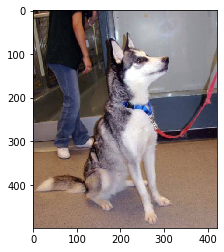

In [3]:
from matplotlib import image
from matplotlib import pyplot
data = image.imread(r'C:\Users\saksh\Downloads\test_set\test_set\dogs\dog.4001.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [4]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

(200, 299, 3)
(434, 500, 3)
(374, 500, 3)
(200, 299, 3)
(333, 500, 3)


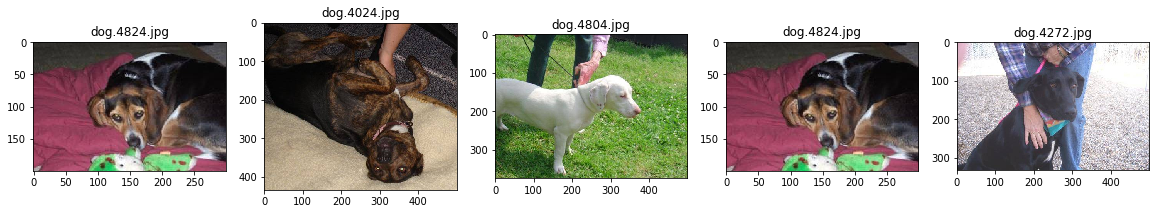

In [5]:
plt.figure(figsize=(20,20))
test_folder=r'C:\Users\saksh\Downloads\test_set\test_set\dogs'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    print(img.shape)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

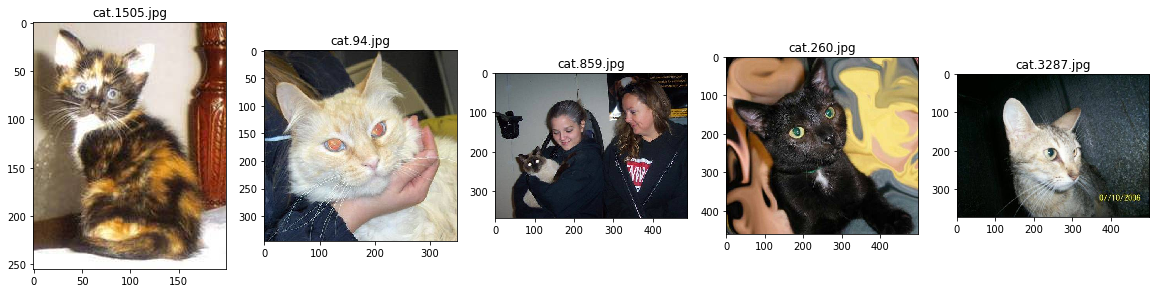

In [6]:
plt.figure(figsize=(20,20))
test_folder=r'C:\Users\saksh\Downloads\training_set\training_set\cats'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [7]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'C:\Users\saksh\Downloads\training_set\training_set'

def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
    
    for dir1 in os.listdir(img_folder):
        print("Collecting images for: ",dir1)
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            try:
                image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            except:
                break
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(img_folder)

In [8]:
img_data=np.array(img_data)
class_name=np.array(class_name)
img_data.shape

(8005, 200, 200, 3)

In [9]:
def dog_cat_mapping(a):
    if a=="dogs":
        return 1
    else:return 0
class_name=list(map(dog_cat_mapping,class_name))
class_name=np.array(class_name)


In [10]:
input_shape=img_data.shape[1:]
input_shape

(200, 200, 3)

In [11]:
from tensorflow.keras.applications import InceptionResNetV2
conv_base=InceptionResNetV2(weights='imagenet',include_top=False,input_shape=(200,200,3))

In [12]:
def model():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
    model=Sequential()
    model.add(conv_base)
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    return model
#The Accuracy is: 0.898204

In [13]:
model=model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 4, 4, 1536)        54336736  
_________________________________________________________________
flatten (Flatten)            (None, 24576)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6291712   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 60,628,705
Trainable params: 60,568,161
Non-trainable params: 60,544
_________________________________________________________________


In [14]:
conv_base.trainable=False
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.fit(x=img_data,y=class_name, epochs=5)

Epoch 1/5
251/251 [==============================] - 429s 2s/step - loss: 0.8751 - accuracy: 0.9714
Epoch 2/5
251/251 [==============================] - 442s 2s/step - loss: 0.0922 - accuracy: 0.9849
Epoch 3/5
251/251 [==============================] - 472s 2s/step - loss: 0.0296 - accuracy: 0.9913
Epoch 4/5
251/251 [==============================] - 489s 2s/step - loss: 0.0267 - accuracy: 0.9921
Epoch 5/5
251/251 [==============================] - 490s 2s/step - loss: 0.0545 - accuracy: 0.9876


In [15]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'C:\Users\saksh\Downloads\test_set\test_set'


# extract the image array and class name
img_data_test, class_name_test =create_dataset(r'C:\Users\saksh\Downloads\test_set\test_set')

In [16]:
img_data_test=np.array(img_data_test)
class_name_test=list(map(dog_cat_mapping,class_name_test))
class_name_test=np.array(class_name_test)
preds=model.predict(img_data_test).round().astype(int)
flat_pred = [item for sublist in preds for item in sublist]
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(class_name_test, flat_pred)
print("The Accuracy is: %2f" % accuracy)

The Accuracy is: 0.976273


In [25]:
incorrects = np.nonzero(model.predict(img_data_test).round().astype(int).reshape((-1,)) != class_name_test)

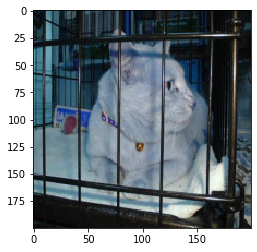

In [71]:
#incorrects- 7,71,84 etc.

plt.imshow(img_data_test[7])

In [ ]:
from keras.models import load_model

model.save('catdog.h5')  # creates a HDF5 file 'my_model.h5'
from keras.models import save_model
#model = save_model(model,'/cat_dog.h5')
IMG_WIDTH=20
IMG_HEIGHT=200
#img_folder='C:\Users\saksh\Downloads\test_set\test_set'


In [ ]:
model.save('./models_catdog', save_format='tf')

In [ ]:
!pip install pyngrok

In [ ]:
!pip install -q streamlit